# NLP Basics + Text classification

## Introduction

In this notebook, the following are to be covered:
- String manipulation
- Text Cleaning
- Text Analysis
- Text Classification

## String manipulation basics

In [1]:
# strings 

# double and single quotes
string1 = "hello world"
string2 = 'hello world'
string1 == string2

True

In [2]:
# multi-line strings can be made using triple quotes (using either double or single quotes)
multiLineStr1 = """check
this string is
looooooooooooooooooong"""

multiLineStr2 = '''check
this string is
looooooooooooooooooong'''

multiLineStr1 == multiLineStr2

True

In [3]:
# when print,newlines are printed
print(multiLineStr1)

check
this string is
looooooooooooooooooong


In [4]:
# when displaying the value, the newlines are shown
multiLineStr1

'check\nthis string is\nlooooooooooooooooooong'

In [5]:
# strings can be concatenated in several ways:
str1 = "implicit " "concatenation"
str2 = "using " + "a " + "plus " + "sign"

# this way is fastest and provides additional ways to format e.g. numbers
str3 = "or {} {} {} {:10.3f}".format("using", "fancy", "formatting", 100.123456)
print(str1)
print(str2)
print(str3)

implicit concatenation
using a plus sign
or using fancy formatting    100.123


In [6]:
# strings are immutable
str1 = "immutable"
# This will give TypeError: 'str' object does not support item assignment
str1[0] = "I"


TypeError: 'str' object does not support item assignment

In [ ]:
# to modify a string, a new string must be created
str2 = "I{}".format(str1[1:])
print(str2)

In [ ]:
# Python has a builtin function to capitalize words
str2 = str1.title()
print(str2)

In [ ]:
# slices work as such [startIndex : endIndex : step]
# leaving out values gives the default value of startIndex = 0, endIndex = the end, 
# step = 1
print(str1[1:])
print(str1[1:] == str1[1:len("immutable"):1])

In [7]:
# beginning of string
print(str1[0])

i


In [8]:
# negative values gives end of string
print(str1[-1])

e


In [9]:
# the start index is INCLUSIVE but the end index is EXCLUSIVE
print(str1[4:8])

tabl


In [10]:
# Text cleaning can be done using Regular expression
# The following website https://regexone.com/references/python has a rich interactive tutorial

import re # Regular expression package
import requests # mining data package
from bs4 import BeautifulSoup # parsing html data package

# In this exemple, we will first collect data about Noam choamsky 
r = requests.get("https://chomsky.info/articles/")
# convert to "soup" from BeautifulSoup to extract HTML stuff easily
soup = BeautifulSoup(r.text,"html5lib")

# Looking at the structure of the webpage, one way is to extract date and title seperately then combine them in a list
date_data = [listItem.text for item in soup.find('a') for listItem in soup.find_all('li')]
title_data = [item.find('a').text for item in soup.find_all('li')]
clean_data = []
for date,title in zip(date_data,title_data):
    try:
        item_split = date.split('.')
        clean_data.append([title.rstrip('.'), item_split[-2].lstrip(" ")])
    except:
        continue

print("There are {} articles".format(len(clean_data))) # Total number of articles
print(clean_data[0]) # first item in the list

There are 303 articles
['Independence of Journalism', 'January 7, 2017']


## Text Cleaning

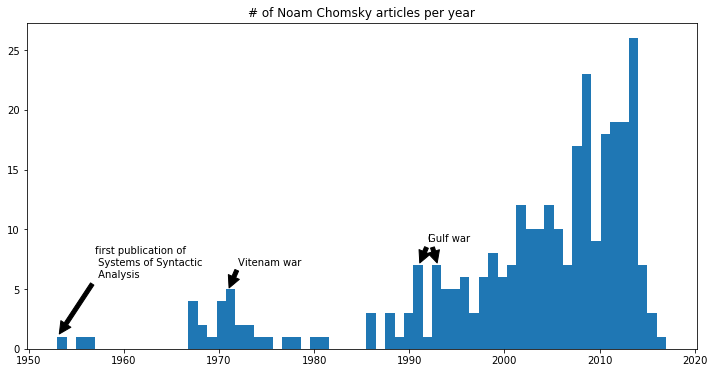

In [11]:
# Let's do some analysis...finally...
# Let's figure out what years Dr. Ptucha has been most prolific

# matplotlib is a plotting library for python
import matplotlib.pyplot as plt
# make the plots inline with the notebook
%matplotlib inline
# numpy is a numerical package for working with fast, efficient, 
# vectorized matrices like in MATLAB
import numpy as np

# look for numbers between 19xx and 20xx
yearRe = re.compile("19\d{2}|20\d{2}")

# make sure the matched object is not None to call the group() 
# function which returns the actual matched text
years = np.array([int(yearRe.search(d[1]).group(0)) for d in clean_data if yearRe.search(d[1]) is not None])
numBins = np.max(years) - np.min(years) + 1

plt.figure(figsize=(12, 6))
plt.hist(years, numBins)
plt.title("# of Noam Chomsky articles per year")
plt.annotate("first publication of\n Systems of Syntactic\n Analysis",
                xy=(1953, 1), xytext=(1957, 6),
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Vitenam war",
                xy=(1971, 5), xytext=(1972, 7),
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Gulf war",
                xy=(1991, 7), xytext=(1992, 9),
                arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("l",
                xy=(1993, 7), xytext=(1992, 9),
                arrowprops=dict(facecolor='black', shrink=0.1))


plt.show()

In [13]:
# Skimming the data shows that there are some articles with more than one language, since we are interested in English
# we remove the other versions
for item in clean_data:
    if ('castellano' in item[0]):
        clean_data.pop(clean_data.index(item))
    elif ('Deutsch'in item[0]):
        clean_data.pop(clean_data.index(item))
    elif ('Japanese' in item[0]):
        clean_data.pop(clean_data.index(item))
        

In [14]:
clean_data

[['Independence of Journalism', 'January 7, 2017'],
 ['US Isolation', 'December 30, 2016'],
 ['An Eight Point Brief for LEV (Lesser Evil Voting)', 'June 15, 2016'],
 ['Noam Chomsky for Refugee Crisis', 'May 5, 2016'],
 ['Turkey continues to muzzle democracy’s watchdogs', 'November 12, 2015'],
 ['"The Iranian Threat" Who Is the Gravest Danger to World Peace?',
  'August 20, 2015'],
 ['One Day in the Life of a Reader of the New York Times', 'April 6, 2015'],
 ['Magna Carta Messed Up the World, Here’s How to Fix It', 'March 23, 2015'],
 ["A Brief History of America's Cold-Blooded, Terroristic Treatment of Cuba",
  'February 5, 2015'],
 ['Chomsky: Paris attacks show hypocrisy of West’s outrage',
  'January 20, 2015'],
 ['We Are All … Fill in the Blank', 'January 10, 2015'],
 ['Obama’s Historic Move', 'December 14, 2014'],
 ['Elites Have Forced America into a National Psychosis to Keep Us Embroiled in Imperial Wars',
  'December 2, 2014'],
 ['How the Young Are Indoctrinated to Obey', 'Decem

In [15]:
# cleaning the text using regular expression is a repetitive process with aim to have a text containing clean words
for item in clean_data:
    clean_data[clean_data.index(item)][0] = re.sub('[Uu]\.[Ss]\.*|U[Ss]\s|US-|[aA]merica\w*|AMERICA','USA ', item[0])
    clean_data[clean_data.index(item)][0] = re.sub("\/"," ", item[0])
    clean_data[clean_data.index(item)][0] = re.sub("|\’s|\”|\“|‘|’|\&",'', item[0])
    clean_data[clean_data.index(item)][0] = re.sub("\'s",'', item[0])
    clean_data[clean_data.index(item)][0] = re.sub('\(([^()]*)\)','', item[0])
    clean_data[clean_data.index(item)][0] = re.sub('\-|–|…|—',' ', item[0])
    clean_data[clean_data.index(item)][0] = re.sub('\s$','', item[0])
    clean_data[clean_data.index(item)][0] = re.sub('\s+',' ', item[0])
    
        
    

In [16]:
clean_data

[['Independence of Journalism', 'January 7, 2017'],
 ['USA Isolation', 'December 30, 2016'],
 ['An Eight Point Brief for LEV', 'June 15, 2016'],
 ['Noam Chomsky for Refugee Crisis', 'May 5, 2016'],
 ['Turkey continues to muzzle democracy’s watchdogs', 'November 12, 2015'],
 ['"The Iranian Threat" Who Is the Gravest Danger to World Peace?',
  'August 20, 2015'],
 ['One Day in the Life of a Reader of the New York Times', 'April 6, 2015'],
 ['Magna Carta Messed Up the World, Here’s How to Fix It', 'March 23, 2015'],
 ['A Brief History of USA Cold Blooded, Terroristic Treatment of Cuba',
  'February 5, 2015'],
 ['Chomsky: Paris attacks show hypocrisy of West’s outrage',
  'January 20, 2015'],
 ['We Are All Fill in the Blank', 'January 10, 2015'],
 ['Obama’s Historic Move', 'December 14, 2014'],
 ['Elites Have Forced USA into a National Psychosis to Keep USA Embroiled in Imperial Wars',
  'December 2, 2014'],
 ['How the Young Are Indoctrinated to Obey', 'December 1, 2014'],
 ['The Leading T

## Text Analysis

In [17]:
# We start by looking at the unigrams of titles
import nltk

# extract the title of every article
titles = [item[0] for item in clean_data]


# tokenize each title, lowercase the tokens to normalize everything, place them all in a list
tokens = [token.lower() for title in titles for token in nltk.word_tokenize(title) if token.isalpha()]
print(tokens[:10])

['independence', 'of', 'journalism', 'usa', 'isolation', 'an', 'eight', 'point', 'brief', 'for']


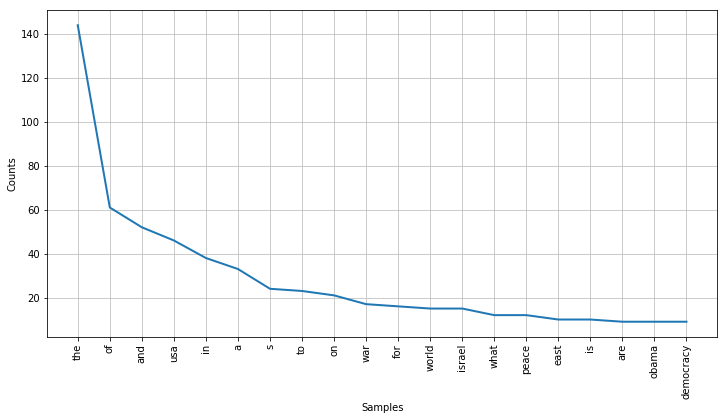

In [18]:
# First thing to do is to look at the count or frequency of words
# NLTK has a nice convenient class to do this called FreqDist, and Python also has collections.Counter() which would do the same thing
# in this example we use FreqDist 
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

In [19]:
# The plot shows a good start, however, there are words such as "the" or "of" that we don't want
# nltk has a collection of stopwords that we can use
from nltk.corpus import stopwords

stoplist = stopwords.words('english')
print(stoplist[:15])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


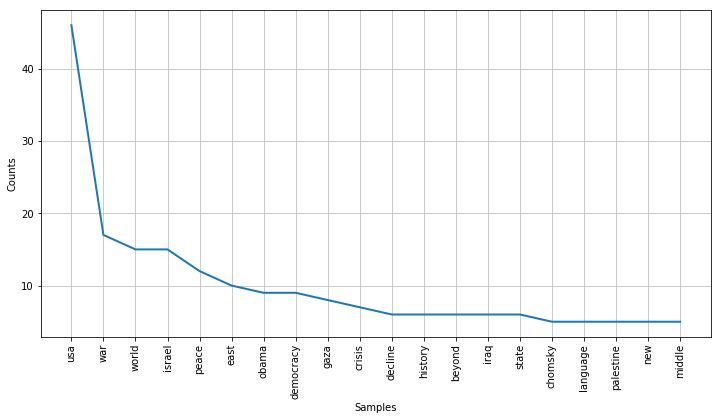

In [20]:
tokens = [token for token in tokens if token not in stoplist]
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

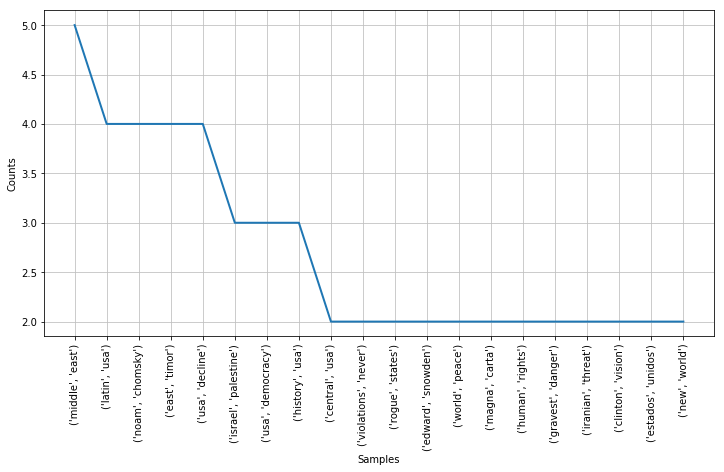

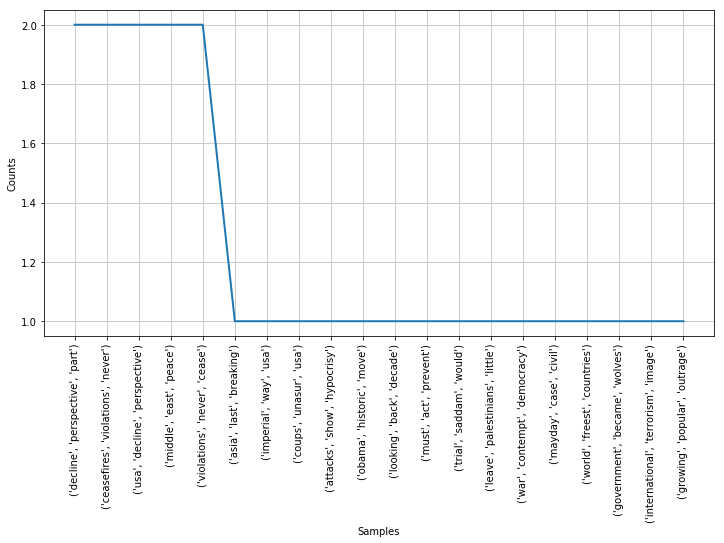

In [21]:
# Apparently Noam Choamsky is writes mostly about USA, WAR, Middle east and Peace
# One step furthere is to perform bigrams and trigrams 
from nltk.util import bigrams, trigrams
from itertools import chain

# we don't want to use the tokens all mashed together like before because we don't
# want to connect the last token in a title with the first token in a different 
# title, so we do it per title
tokensPerTitle = [nltk.word_tokenize(title) for title in titles]
tokensPerTitle = [[token.lower() for token in t if token.isalpha() and token.lower() not in stoplist] for t in tokensPerTitle]

# now we need to do some crazy python list unpacking which you might not understand
# but this is just making a single list of the bigrams of each title
b = list(chain(*[(list(bigrams(tokens))) for tokens in tokensPerTitle]))
# same with trigrams
t = list(chain(*[(list(trigrams(tokens))) for tokens in tokensPerTitle]))

fdist = nltk.FreqDist(b)
plt.figure(figsize=(12, 6))
# plot the top 20 bigrams
fdist.plot(20)

fdist = nltk.FreqDist(t)
plt.figure(figsize=(12, 6))
# plot the top 20 trigrams
fdist.plot(20)

## Text Classification

In [22]:
# First of all, words like violations and violation should be counted as 
# the same word, so let's "lemmatize" them which means to convert 
# them to their base "lemma" e.g. studying -> study
from nltk.stem.wordnet import WordNetLemmatizer


def Lemmatize(word):
    wnl = WordNetLemmatizer()
    # try to lemmatize verbs first
    lemma = wnl.lemmatize(word, 'v')
    # if nothing changed, try it as a noun
    if lemma == word:
        return wnl.lemmatize(word)
    return lemma
        
titles = [[Lemmatize(token) for token in title] for title in tokensPerTitle]
    
# next, we set up data for training and testing.
labels = ["usa" in title for title in titles]
print(labels)

[False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, Fals

In [23]:
# we want to remove the word "usa" from the titles, so the ML 
# algorithm doesn't pick up on that feature
for title in titles:
    while "usa" in title:
        title.remove("usa")


from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

# scikit's vectorizers actually can do all the tokenizing, and stoplisting, and the n-gram extraction.
# we need to convert the title tokens back to single strings
Xdata = [" ".join(title) for title in titles]

# We're going to use Scikit's "Gridsearch", We're also going to try these two feature vectorizers 
# And we're gonna test out SVMs vs Naive Bayes

# These are the feature vectorizers that will convert the text to number matrices
tfidf = TfidfVectorizer()
count = CountVectorizer()

# We use pipeline module to build our models
LinSVMTfidf = Pipeline([('feats', tfidf), ('clf', LinearSVC())])
LinSVMCount = Pipeline([('feats', count), ('clf', LinearSVC())])

SVMTfidf = Pipeline([('feats', tfidf), ('clf', SVC())])
SVMCount = Pipeline([('feats', count), ('clf', SVC())])

NBTfidf = Pipeline([('feats', tfidf), ('clf', MultinomialNB())])
NBCount = Pipeline([('feats', count), ('clf', MultinomialNB())])

# Parameters
LinSVMParams = {'clf__C': (.01, .1, 1, 10, 100), 'feats__ngram_range': ((1,1), (1,2), (1,3)), 'feats__binary': (True, False)}
SVMParams = {'clf__C': (.01, .1, 1, 10, 100), 'clf__gamma': (.01, .1, 1, 10, 100), 'feats__ngram_range': ((1,1), (1,2), (1,3)), 'feats__binary': (True, False)}
NBParams = {'feats__ngram_range': ((1,1), (1,2), (1,3)), 'feats__binary': (True, False)}
    
def printGridSearchResults(gs, params, x, y):
    pipe = gs.fit(x, y)
    print("Best score: " + str(pipe.best_score_))
    print("-------------------------------------------------------------------------------")
    
# lets make some gridsearch objects and see what happens
# n_jobs=-1, cv=5 
gsLinSVMTfidf = GridSearchCV(LinSVMTfidf, LinSVMParams, n_jobs=-1, cv=5)
gsLinSVMCount = GridSearchCV(LinSVMCount, LinSVMParams, n_jobs=-1, cv=5)
gsSVMTfidf = GridSearchCV(SVMTfidf, SVMParams, n_jobs=-1, cv=5)
gsSVMCount = GridSearchCV(SVMCount, SVMParams, n_jobs=-1, cv=5)
gsNBTfidf = GridSearchCV(NBTfidf, NBParams, n_jobs=-1, cv=5)
gsNBCount = GridSearchCV(NBCount, NBParams, n_jobs=-1, cv=5)
    
print("LinearSVM with TF-IDF")
printGridSearchResults(gsLinSVMTfidf, LinSVMParams, Xdata, labels)

print("LinearSVM with Counts")
printGridSearchResults(gsLinSVMCount, LinSVMParams, Xdata, labels)

print("SVM with TF-IDF")
printGridSearchResults(gsSVMTfidf, SVMParams, Xdata, labels)

print("SVM with Counts")
printGridSearchResults(gsSVMCount, SVMParams, Xdata, labels)

print("NB with TF-IDF")
printGridSearchResults(gsNBTfidf, NBParams, Xdata, labels)

print("NB with Counts")
printGridSearchResults(gsNBCount, NBParams, Xdata, labels)

f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
f:\Users\Tahar\Anacondanew\envs\ztdl\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


LinearSVM with TF-IDF
Best score: 0.8487972508591065
-------------------------------------------------------------------------------
LinearSVM with Counts
Best score: 0.8487972508591065
-------------------------------------------------------------------------------
SVM with TF-IDF
Best score: 0.8487972508591065
-------------------------------------------------------------------------------
SVM with Counts
Best score: 0.8487972508591065
-------------------------------------------------------------------------------
NB with TF-IDF
Best score: 0.8487972508591065
-------------------------------------------------------------------------------
NB with Counts
Best score: 0.845360824742268
-------------------------------------------------------------------------------


In [24]:
# seems that the best performance was achieved with Naive Bayes with Counts features 
# in smaller datasets, counts better choice than tf-idf

# Let's look at the best words (we use linear SVM to get weights)
def printNMostInformative(vectorizer, clf, N):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)
            
clf = LinearSVC(C=.01)
feats = CountVectorizer(binary=True, ngram_range=(1,1))
LinearSVMPipe = Pipeline([('feats', feats), ('clf', clf)])
LinearSVMPipe.fit(Xdata, labels)
printNMostInformative(feats, clf, 10)

Class 1 best: 
(-0.084177564272645125, 'war')
(-0.058641458325865189, 'obama')
(-0.053242877507692569, 'gaza')
(-0.046115017145266571, 'crisis')
(-0.042878600914345012, 'peace')
(-0.042356650190806228, 'beyond')
(-0.035974517102762595, 'language')
(-0.035353288271371158, 'palestine')
(-0.035337632755479999, 'doctrine')
(-0.035109151959836986, 'new')
Class 2 best: 
(0.12624097966148148, 'decline')
(0.11128677793431566, 'latin')
(0.062454172608469666, 'iraq')
(0.059046337380887964, 'invasion')
(0.058821600665262305, 'central')
(0.058062588019588385, 'history')
(0.056104106053388982, 'south')
(0.055511341711797238, 'leader')
(0.05461267971212326, 'takeover')
(0.053708194373503396, 'asia')
